In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sales_prediction.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<font size="5">**Basic Data Preparation - Splitting Data**</font>

In [4]:
X = df.drop(columns=['Item_Outlet_Sales', "Outlet_Size"])
y = df['Item_Outlet_Sales']
SEED = 42

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
X_train.shape, X_test.shape

((5966, 10), (2557, 10))

<font size="5">**Data Exploration and Understanding**</font>

In [6]:
X_train_copied = X_train.copy()

In [7]:
X_train_copied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Location_Type       5966 non-null   object 
 9   Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 512.7+ KB


In [8]:
num_data = X_train_copied.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [9]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def numeric_count_visualize(data_frame, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    sns.histplot(data = data_frame, x = col_name, ax = ax[0])
    sns.boxplot(data = data_frame, y = col_name, ax = ax[1])

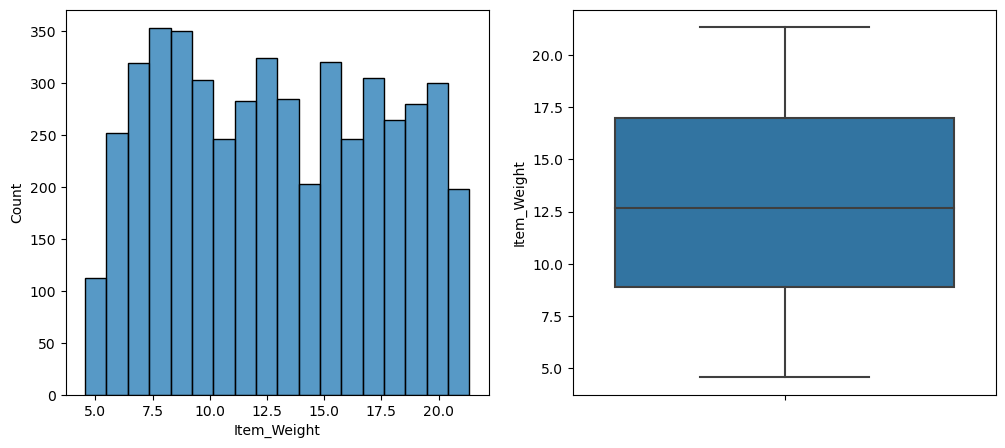

In [12]:
numeric_count_visualize(X_train_copied, 'Item_Weight')

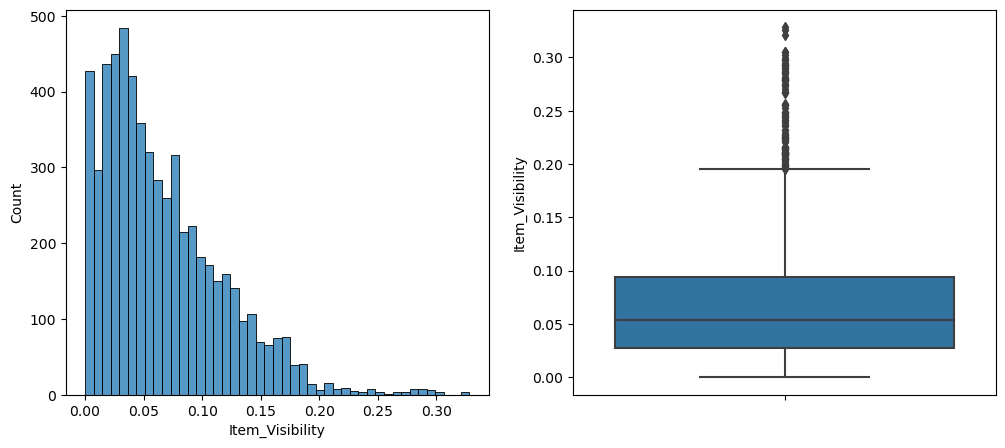

In [13]:
numeric_count_visualize(X_train_copied, 'Item_Visibility')

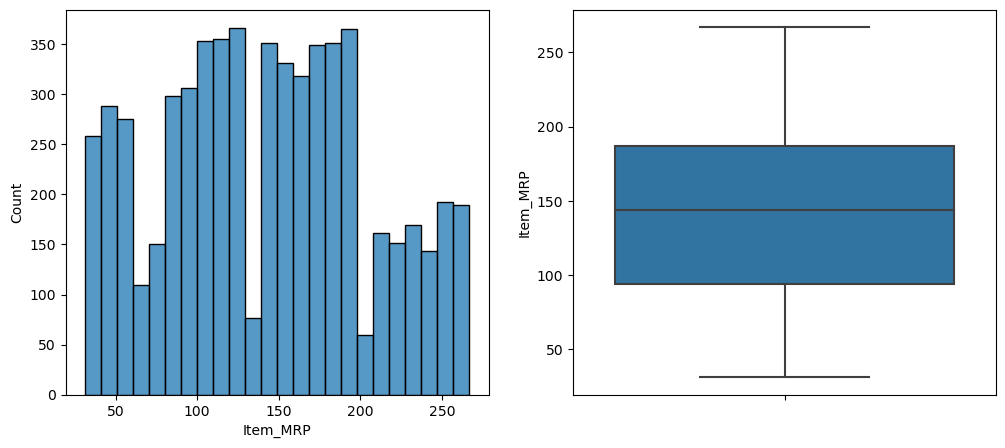

In [14]:
numeric_count_visualize(X_train_copied, 'Item_MRP')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

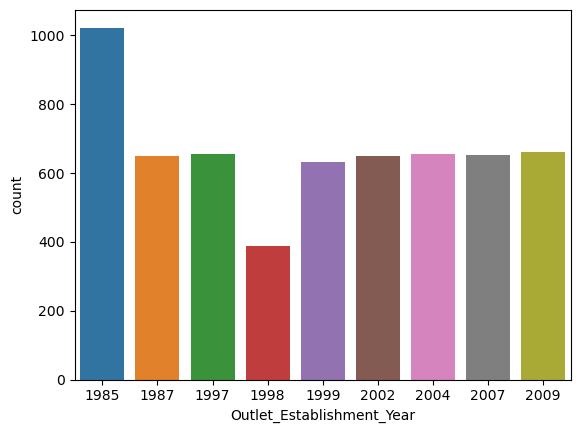

In [15]:
sns.countplot(data = X_train_copied, x = 'Outlet_Establishment_Year')

Text(0, 0.5, 'Item_MRP')

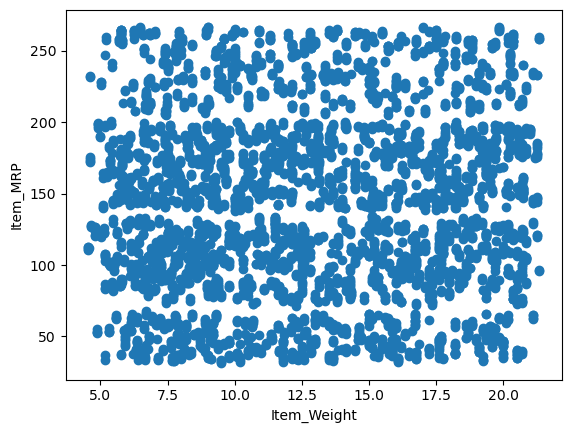

In [16]:
plt.scatter(data = X_train_copied, x = 'Item_Weight', y = 'Item_MRP')
plt.xlabel('Item_Weight')
plt.ylabel('Item_MRP')

In [17]:
cat_data = X_train_copied.select_dtypes(include=['object'])
cat_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,Tier 3,Supermarket Type1


In [18]:
cat_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,5966,5966
unique,1543,5,16,10,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Tier 3,Supermarket Type1
freq,9,3535,905,668,2367,3893


In [19]:
cat_data['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [20]:
cat_data['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [21]:
cat_data['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [22]:
cat_data['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [23]:
cat_data['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [24]:
cat_data['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

<font size="5">**Data Wrangling and Feature Engineering**</font>

In [25]:
X_train_copied['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [26]:
def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame['Item_Type'].map({
                                'FD': 'Food',
                                'NC': 'Non_Consumables',
                                'DR': 'Drink'
                            })
    return data_frame

In [27]:
X_train_copied = create_item_type(X_train_copied)
X_train_copied.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,Tier 3,Supermarket Type1


In [28]:
X_train_copied.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [29]:
X_train_copied[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [30]:
X_train_copied[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [31]:
ITEM_ID_WEIGHT_PIVOT = X_train_copied.pivot_table(values = 'Item_Weight', index = 'Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [32]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_copied.pivot_table(values = 'Item_Weight', 
                                                    index = 'Item_Type', aggfunc = 'median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_TYPE_WEIGHT_MAPPING.items())[:10]

[('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)]

In [33]:
def assign_item_weight(data_frame):
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
    return data_frame

In [34]:
X_train_copied = assign_item_weight(X_train_copied)

In [35]:
X_train_copied.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [36]:
X_train_copied['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [37]:
def standardize_item_fat(data_frame):
    data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({
                                    'Low Fat': 'Low_Fat',
                                    'LF': 'Low_Fat',
                                    'low fat': 'Low_Fat',
                                    'reg': 'Regular'
                                })
    return data_frame

In [38]:
X_train_copied = standardize_item_fat(X_train_copied)

In [39]:
X_train_copied['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [40]:
X_train_copied.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Low_Fat             1137
dtype: int64

In [41]:
def correct_nc_fat(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'
    return data_frame

In [42]:
X_train_copied = correct_nc_fat(X_train_copied)

In [43]:
X_train_copied.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [44]:
X_train_copied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Location_Type       5966 non-null   object 
 9   Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 512.7+ KB


<font size="5">**Data Preparation for Machine Learning**</font>

In [45]:
def prepare_dataset(data_frame):
    data_frame = create_item_type(data_frame)
    data_frame = assign_item_weight(data_frame)
    data_frame = standardize_item_fat(data_frame)
    data_frame = correct_nc_fat(data_frame)
    return data_frame

In [46]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [47]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [48]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [49]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [50]:
cat_features = X_train.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,Tier 3,Supermarket Type1


In [51]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_features)

OneHotEncoder(handle_unknown='ignore')

In [52]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_features.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [53]:
num_features_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_features_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [54]:
cat_features_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(), columns = ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [55]:
X_train_final = pd.concat([num_features_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [56]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [57]:
num_features_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_features_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_features_test).toarray(), columns = ohe_feature_names)
X_test_final = pd.concat([num_features_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<font size="5">**Sales Prediction Modeling**</font>

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

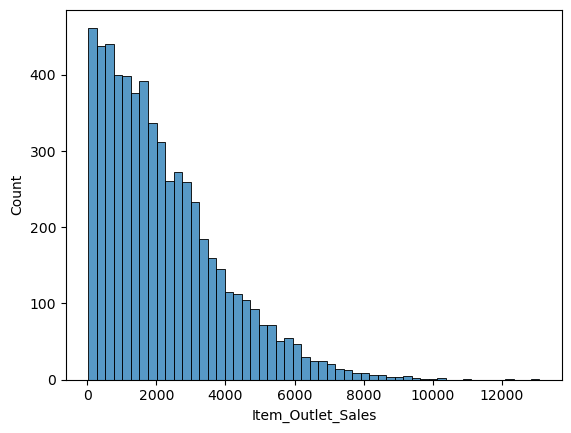

In [58]:
sns.histplot(y_train)

In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate
import numpy as np

In [60]:
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'),)
    print('Model:', model)
    r2_scores = cv_results['test_r2']
    print('R2 CV Scores:', r2_scores)
    print('R2 CV Scores mean/stdev: ', np.mean(r2_scores), '/', np.std(r2_scores))
    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse_scores]
    print('RMSE CV Scores: ', rmse_scores)
    print('RMSE CV Scores mean/stdev: ', np.mean(rmse_scores), '/', np.std(rmse_scores))

In [61]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV Scores: [0.57032551 0.52763365 0.54408044 0.55613332 0.51908878]
R2 CV Scores mean/stdev:  0.5434523403185594 / 0.01858592468654398
RMSE CV Scores:  [1104.429335370034, 1167.4613187226528, 1178.9642210399063, 1151.9507081101574, 1203.4463738331447]
RMSE CV Scores mean/stdev:  1161.2503914151791 / 33.00900734608374


In [62]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.60531991 0.59282681 0.57389125 0.60765427 0.54979764]
R2 CV Scores mean/stdev:  0.5858979773294084 / 0.02166080472912545
RMSE CV Scores:  [1058.499740280529, 1083.9084656484256, 1139.7687418800097, 1083.0339940175786, 1164.3892069015103]
RMSE CV Scores mean/stdev:  1105.9200297456105 / 39.550836726286235


In [63]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.57997904 0.54955898 0.5454454  0.57902089 0.54448289]
R2 CV Scores mean/stdev:  0.5596974394327374 / 0.016261183008807654
RMSE CV Scores:  [1091.9522058604246, 1140.0449839118412, 1177.1980725719595, 1121.858023787134, 1171.2419994127176]
RMSE CV Scores mean/stdev:  1140.4590571088154 / 31.611483069817485


In [64]:
xgr = xgb.XGBRegressor(random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)
R2 CV Scores: [0.57835858 0.55367158 0.55498042 0.58561184 0.52161993]
R2 CV Scores mean/stdev:  0.5588484703426628 / 0.022470639218869826
RMSE CV Scores:  [1094.0565792090738, 1134.828658450724, 1164.7858138202027, 1113.0413368021598, 1200.2751815874383

In [65]:
X_train_c = X_train.copy().drop(columns='Item_Identifier')

cat_cols = X_train_c.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_c.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [66]:
cat_features = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_features)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_features.columns)

In [67]:
num_features_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_features_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(), columns = ohe_feature_names)
X_train_final = pd.concat([num_features_train, X_train_cat_ohe], axis=1)

In [68]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV Scores: [0.56144817 0.52403439 0.53588985 0.55957902 0.53874207]
R2 CV Scores mean/stdev:  0.5439386974778062 / 0.014416460724068662
RMSE CV Scores:  [1115.780100598765, 1171.900689351104, 1189.507132952267, 1147.4707533381709, 1178.5993936483262]
RMSE CV Scores mean/stdev:  1160.6516139777266 / 26.33815964439462


In [69]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.60104904 0.5868648  0.57972387 0.61910456 0.56348263]
R2 CV Scores mean/stdev:  0.5900449803229385 / 0.01890896743285916
RMSE CV Scores:  [1064.2113974739714, 1091.815156820451, 1131.9412277707106, 1067.1132528603252, 1146.5554198856503]
RMSE CV Scores mean/stdev:  1100.3272909622217 / 33.5155707736826


In [70]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.57997904 0.54955898 0.5454454  0.57902089 0.54448289]
R2 CV Scores mean/stdev:  0.5596974394327374 / 0.016261183008807654
RMSE CV Scores:  [1091.9522058604246, 1140.0449839118412, 1177.1980725719595, 1121.858023787134, 1171.2419994127176]
RMSE CV Scores mean/stdev:  1140.4590571088154 / 31.611483069817485


In [71]:
xgr = xgb.XGBRegressor(random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)
R2 CV Scores: [0.53872681 0.49128273 0.48554812 0.51399184 0.492256  ]
R2 CV Scores mean/stdev:  0.5043611003734965 / 0.01972439569575354
RMSE CV Scores:  [1144.3193775337961, 1211.5497798462743, 1252.3591504719243, 1205.3950528823239, 1236.5642621093327

The statistical values indicate that the Gradient Boosting Regressor is the best fit for predicting the sales.